In [1]:
%matplotlib inline

from sklearn.datasets import load_digits


data = load_digits()
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

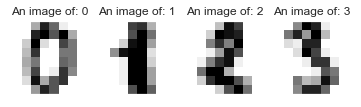

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
n_of_test_plots = 4

for nth_plot in range(1, n_of_test_plots + 1):
    plt.subplot(100 + 10 * n_of_test_plots + nth_plot)
    plt.imshow( - data.data[nth_plot - 1].reshape(8, 8), cmap='gray');
    plt.xticks(());
    plt.yticks(());
    plt.title('An image of: ' + str(data.target[nth_plot - 1]))

In [10]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


scaler = MinMaxScaler()
class_encoder = OneHotEncoder(categories='auto')

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.1, random_state=1)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = class_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = class_encoder.transform(y_test.reshape(-1, 1)).toarray()

In [12]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


mlp = MLPClassifier(
    learning_rate_init=0.05,
    max_iter=175,
    hidden_layer_sizes=[100],
    alpha=0.01,
    random_state=2
)

print('Training model ...')
mlp.fit(X_train_scaled, y_train_encoded)

print('Score on train:', mlp.score(X_train_scaled, y_train_encoded))
print('Score on test:', mlp.score(X_test_scaled, y_test_encoded))
print()
print('Cross Selection score on train:', np.mean(cross_val_score(mlp, X_train_scaled, y_train_encoded, cv=3)))
print('Cross Selection score on test:', np.mean(cross_val_score(mlp, X_test_scaled, y_test_encoded, cv=3)))
print()
print(mlp)

Training model ...
Score on train: 0.9529993815708101
Score on test: 0.9555555555555556

Cross Selection score on train: 0.9542362399505256
Cross Selection score on test: 0.8166666666666668

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100], learning_rate='constant',
       learning_rate_init=0.05, max_iter=175, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
